In [1]:
import os
import pandas as pd
import json

In [2]:
output_dir = './AlphaPoseOutput'

In [15]:
with open('./AlphaPoseOutput/abnormal_scene_1_scenario_1_alphapose_tracked_person.json') as f:
    tracking = json.load(f)

In [5]:
file = './AlphaPoseOutput/abnormal_scene_1_scenario_1_alphapose-results.json'

In [3]:
df = pd.read_json('./AlphaPoseOutput/abnormal_scene_1_scenario_1_alphapose-results.json')

In [19]:
df['video'] = '_'.join(file.split('/')[-1].split('-')[0].split('_')[0:-1])
if 'abnormal' in file:
    df['label'] = 'abnormal'
else:
    df['label'] = 'normal'
df = df[['video', 'image_id', 'label', 'keypoints', 'score']]

,video,image_id,label,keypoints,score
0,abnormal_scene_1_scenario_1,41.jpg,abnormal,"[5.195108413696289, 479.9351806640625, 0.00632...",2.037114
1,abnormal_scene_1_scenario_1,41.jpg,abnormal,"[20.164642333984375, 482.60321044921875, 0.157...",1.567047
2,abnormal_scene_1_scenario_1,41.jpg,abnormal,"[29.535585403442383, 699.7320556640625, 0.0536...",0.647773
3,abnormal_scene_1_scenario_1,42.jpg,abnormal,"[75.02191162109375, 276.1699523925781, 0.93825...",2.857396
4,abnormal_scene_1_scenario_1,43.jpg,abnormal,"[131.11618041992188, 289.27117919921875, 0.944...",2.890377
...,...,...,...,...,...
63,abnormal_scene_1_scenario_1,102.jpg,abnormal,"[1075.19482421875, 347.8183288574219, 0.430102...",2.862549
64,abnormal_scene_1_scenario_1,103.jpg,abnormal,"[1074.4276123046875, 347.0867919921875, 0.4370...",2.877481
65,abnormal_scene_1_scenario_1,104.jpg,abnormal,"[1077.891357421875, 348.805908203125, 0.438158...",2.804903
66,abnormal_scene_1_scenario_1,105.jpg,abnormal,"[1072.9036865234375, 355.07183837890625, 0.041...",2.502940


In [10]:
df2 = pd.read_json('./AlphaPoseOutput/abnormal_scene_1_scenario_1_alphapose_tracked_person.json')

In [29]:
def get_jsons(directory: str):
    """Function that exctracts the mp4 files from the given directory
    and returns the path to the video and it's annotations
    """
    filelist = [];
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.json'):
                json_file = os.path.join(root,file)
                filelist.append(json_file)
    return filelist

In [30]:
json_files = get_jsons(output_dir)

In [32]:
# Process pose results jsons
dfs = []
for file in json_files:
    if file.endswith('results.json'):
        df = pd.read_json(file)
        df['video'] = '_'.join(file.split('/')[-1].split('-')[0].split('_')[0:-1])
        if 'abnormal' in file:
            df['label'] = 'abnormal'
        else:
            df['label'] = 'normal'
        df = df[['video', 'image_id', 'label', 'keypoints', 'score']]
        dfs.append(df)
df_overview = pd.concat(dfs, ignore_index=True)

<Axes: >

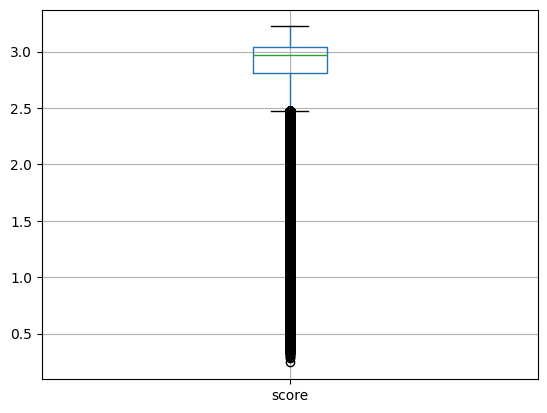

In [35]:
df_overview.boxplot('score')